# Apple, Inc. (AAPL) - Linear Regression Models:


### Overview: 
- 1) Importing the data.
- 2) Data Preprocessing.
- 3) Splitting the data into a Training and Testing Set
- 4) Normalizing the data.
- 5) Modeling.


## Importing Libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from datetime import datetime

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import sys
sys.path.append('..')

-----

## Company Name

In [3]:
company_name = 'Apple'

------

## Importing the Data:

In [4]:
from lib.helper import data_importer

In [5]:
df = data_importer(company_name)

### Taking a Look at the Data:

In [6]:
df.head(3)

,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0


-----

## Importing the Time-Shifted Data Set:

In [7]:
from lib.helper import df_shift_importer

In [8]:
df_shift = df_shift_importer(company_name)

### Taking a Look at the Shifted Dataframe:

In [9]:
df_shift.head(2)

,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,Adj_Low,...,Low_Long_EMA,Close_Long_EMA,Volume_Long_EMA,Ex_Dividend_Long_EMA,Split_Ratio_Long_EMA,Adj_Open_Long_EMA,Adj_High_Long_EMA,Adj_Low_Long_EMA,Adj_Close_Long_EMA,Adj_Volume_Long_EMA
Date,,,,,,,,,,,,,,,,,,,,,
1981-04-15,27.88,28.00,27.88,27.88,29700.0,0.0,1.0,0.409914,0.411679,0.409914,...,27.100545,27.100545,395955.964908,0.0,1.0,0.399428,0.400780,0.398454,0.398454,2.217353e+07
1981-04-16,26.63,26.63,26.50,26.50,152000.0,0.0,1.0,0.391536,0.391536,0.389625,...,27.086579,27.086579,390282.570375,0.0,1.0,0.399245,0.400565,0.398249,0.398249,2.185582e+07


-------

# Splitting the Data into a Training and Testing Set


## Split the Data to Predict 2017 and onwards:

In [10]:
def import_split_data(company_name):
    """ 
    Returns the Train and Test Set from a CSV. 
    Additionally, the Date Column is converted to date time and placed as the index. 
    """
    company_name=company_name
    
    X_train = pd.read_csv(f'data/modeling_data/{company_name}_X_Train.csv')    
    X_train['Date'] = pd.to_datetime(X_train.Date)
    X_train.set_index('Date', inplace=True)
    X_train.sort_index(inplace=True, ascending=True)
    
    X_test = pd.read_csv(f'data/modeling_data/{company_name}_X_Test.csv')
    X_test['Date'] = pd.to_datetime(X_test.Date)
    X_test.set_index('Date', inplace=True)
    X_test.sort_index(inplace=True, ascending=True)
    
    return X_train, X_test

### Splitting the Data into a Train and Test Set:

In [11]:
X_train, X_test = import_split_data(company_name)

### Taking a Look at the Train Set:

In [12]:
X_train.tail(3)

,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,Adj_Low,...,Low_Long_EMA,Close_Long_EMA,Volume_Long_EMA,Ex_Dividend_Long_EMA,Split_Ratio_Long_EMA,Adj_Open_Long_EMA,Adj_High_Long_EMA,Adj_Low_Long_EMA,Adj_Close_Long_EMA,Adj_Volume_Long_EMA
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-28,116.52,117.8000,116.49,117.26,18296855.0,0.0,1.0,115.080808,116.344998,115.051178,...,110.566050,111.471650,3.338105e+07,0.007306,1.0,109.570218,110.508678,108.902823,109.794971,3.338106e+07
2016-12-29,117.52,118.0166,116.20,116.76,20905892.0,0.0,1.0,116.068456,116.558923,114.764760,...,110.697072,111.594635,3.309093e+07,0.007136,1.0,109.721340,110.649382,109.039147,109.923409,3.309094e+07
2016-12-30,116.45,117.1095,116.40,116.73,15039519.0,0.0,1.0,115.011672,115.663027,114.962290,...,110.829698,111.714062,3.267113e+07,0.006970,1.0,109.844371,110.765978,109.176895,110.048172,3.267114e+07


### Taking a Look at the Test Set:

In [20]:
X_test.head(3)

,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,Adj_Low,...,Low_Long_EMA,Close_Long_EMA,Volume_Long_EMA,Ex_Dividend_Long_EMA,Split_Ratio_Long_EMA,Adj_Open_Long_EMA,Adj_High_Long_EMA,Adj_Low_Long_EMA,Adj_Close_Long_EMA,Adj_Volume_Long_EMA
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,116.65,117.20,115.43,115.82,30586265.0,0.0,1.0,115.209202,115.752409,114.004271,...,110.936682,111.809549,3.262264e+07,0.006808,1.0,109.969134,110.881942,109.289159,110.149132,3.262266e+07
2017-01-04,115.80,116.33,114.76,116.15,28781865.0,0.0,1.0,114.369701,114.893155,113.342546,...,111.025596,111.910490,3.253332e+07,0.006650,1.0,110.071473,110.975226,109.383424,110.255324,3.253334e+07
2017-01-05,115.85,116.51,115.75,116.02,21118116.0,0.0,1.0,114.419083,115.070931,114.320318,...,111.135466,112.006060,3.226785e+07,0.006495,1.0,110.172580,111.070475,109.498236,110.356060,3.226787e+07


-----

# Normalizing the Data with MinMaxScaler

In [14]:
def mm_scaler(X_train, X_test, dataframe):
    """
    Returns scaled X_train & X_test data sets and holdouts for each data set using the dataframe.
    
    Parameter
    -------------------------------------------------------------------------------------------------------------
    X_train : var
        Passes a variable assigned to the X_train data set.
    
    X_test : str
        Passes a variable assigned to the X_test data set.
    
    dataframe : var
        Passes a variable assigned to a pandas data frame.
    """
    temp_df = dataframe.copy()
    
    # Instatiating the MinMaxScaler.
    scaler = MinMaxScaler(feature_range=(-1, 1))
    # Fitting and Transforming the X_train Values.
    X_train_sc = scaler.fit_transform(X_train.values)
    # Transforming the X_test values.
    X_test_sc = scaler.transform(X_test.values)
    
    # Creating X and y holdouts using the original data frame.
    y_train = temp_df[X_train.index[0]:X_train.index[-1]].Close.values
    y_test = temp_df[X_test.index[0]:X_test.index[-1]].Close.values
    return X_train_sc, X_test_sc, y_train, y_test

In [15]:
X_train_sc, X_test_sc, y_train, y_test = mm_scaler(X_train, X_test, df)

----

# Modeling

## Attempting a Simple Linear Regression Model:

In [15]:
def linear_model(X_train, y_train, X_test, y_test):
    """
    Returns the fitted model using the Linear Regression Model from SK-Learn.
    Prints the Training Score, Testing score, & the Average Price predicted.
    Renders a visualization of the Predicted and Actual Prices.
    
    Parameters
    -------------------------------------------------------------------------------------------------------------
    X_train : var
        Passes the variable assigned to the X variable of your training set, whether scaled or not. 
   
    y_train : var
        Passes the variable assigned to the y variable of your training set, whether scaled or not. 
    
    X_test : var
        Passes the variable assigned to the X variable of your testing set, whether scaled or not. 
    
    y_test : var
        Passes the variable assigned to the y variable of your testing set, whether scaled or not.
    """
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    train_score = lr.score(X_train, y_train)
    test_score = lr.score(X_test, y_test)
    predicted = lr.predict(X_test).mean()
    
    plt.scatter(y_test, lr.predict(X_test))
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    
    print(f'Train Score: {train_score}\nTest Score: {test_score}\nPredictive Mean: {predicted}') 
    return lr

### Scoring the Training and Test Data:

/Users/adamdelreal/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


Train Score: 0.9977022528603676
Test Score: 0.8145726502498885
Predictive Mean: 148.47558132447296


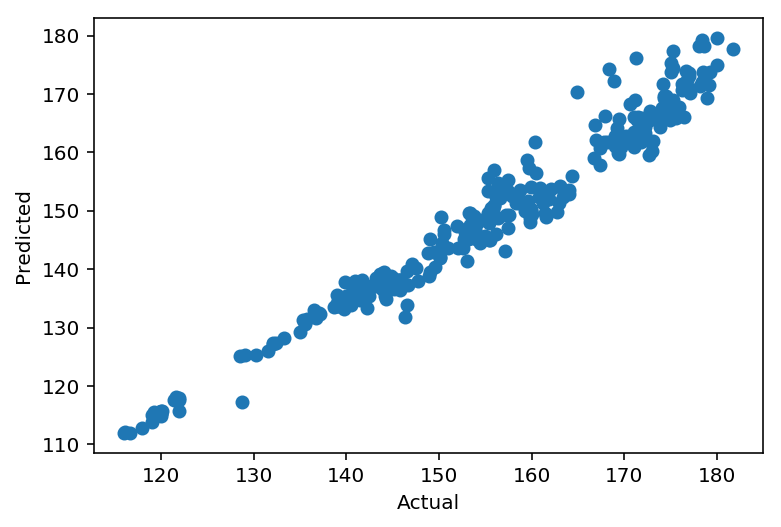

In [16]:
lr = linear_model(X_train_sc, y_train, X_test_sc, y_test)

### Taking a Look at the Coefficients: 

In [17]:
coef_weights = pd.DataFrame(lr.coef_, index=X_train.columns, columns=['weight'])

In [18]:
coef_weights.sort_values('weight').tail()

,weight
Adj_Open_Mid_EMA,2224.128321
Open_Mid_EMA,2373.446045
Adj_Low_Long_EMA,4220.969403
Adj_High_Long_EMA,6009.097982
Adj_Close_Mid_EMA,6822.863717


-----

# Decomposing Signal Components with Principal Component Analysis (PCA):

### Creating a Function to Instantiate the PCA Decomposition:

In [19]:
def pca_decomposition(X_train, X_test, num_components):
    """
    Returns a fitted and transformed X_train and a transformed X_test using Principal Components Analysis from SK-Learn.
    
    Parameters
    -------------------------------------------------------------------------------------------------------------
    X_train : var
        Passes the variable assigned to the X variable of your training set, whether scaled or not. 
        
    X_test : var
        Passes the variable assigned to the X variable of your testing set, whether scaled or not.     
    """
    # Instatiating SK-Learns PCA.
    pca = PCA(n_components=num_components, random_state=42)
    # Fitting and Transforming the X_train.
    X_train_pca = pca.fit_transform(X_train)
    # Transforming the X_test
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca

### Fitting and Transforming with PCA:

In [20]:
X_train_pca, X_test_pca = pca_decomposition(X_train_sc, X_test_sc, 2)

### Scoring the PCA Weighted Data on a Linear Regression Model:

Train Score: 0.9829847772949417
Test Score: 0.9051244925652794
Predictive Mean: 154.95856891488518


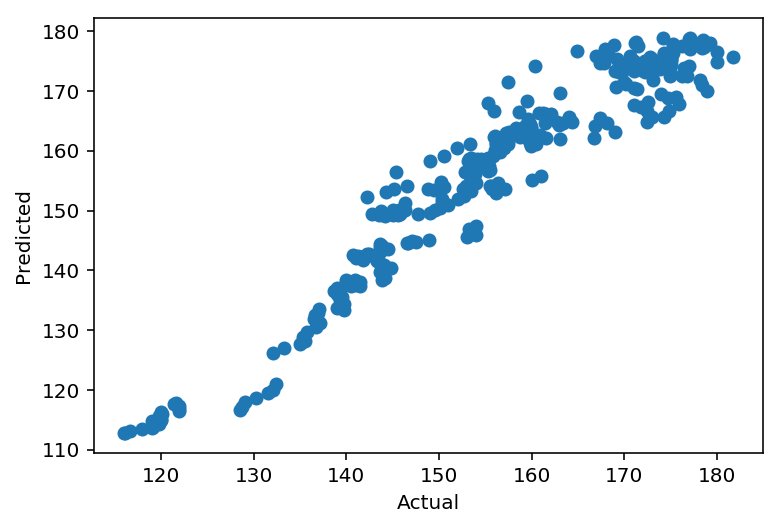

In [21]:
lr_pca = linear_model(X_train_pca, y_train, X_test_pca, y_test)

-----

# Bagging Regressor Model

### Creating a function to fit a Bagging Regressor Model:

In [22]:
def br_model(X_train, y_train, X_test, y_test, base_estimator, n_estimators, max_samples, max_features, bootstrap):
    """
    Returns the fitted model using the Bagging Regressor Model from SK-Learn.
    Prints the Training Score, Testing score, & the average price predicted.
    Renders a visualization of the Predicted and Actual Prices.
    
    Parameters
    -------------------------------------------------------------------------------------------------------------
    X_train : var
        Passes the variable assigned to the X variable of your training set, whether scaled or not. 
   
    y_train : var
        Passes the variable assigned to the y variable of your training set, whether scaled or not. 
    
    X_test : var
        Passes the variable assigned to the X variable of your testing set, whether scaled or not. 
    
    y_test : var
        Passes the variable assigned to the y variable of your testing set, whether scaled or not. 
    
    Bagging Regressor Parameters
    -------------------------------------------------------------------------------------------------------------
    base_estimator : var
        Passes the variable assigned to the scikit learn model.  >> lr = LinearRegression()
    
    n_estimators : int
        Passes the number of estimators to be used in the Bagging Regressor Model.  
    
    max_samples : int
        Passes the maximum number of samples to be used in the Bagging Regressor Model.  
    
    max_features : float
        Passes the maximum number of features to be used in the Bagging Regressor Model.  
    
    bootstrap : boolean
        Passes boolean condition be used in the Bagging Regressor Model. >> True or False     
    """
    
    # Instatiating the Bagging Regresssor.
    br = BaggingRegressor(base_estimator=base_estimator, n_estimators=n_estimators, 
                          max_samples=max_samples, max_features=max_features, bootstrap=bootstrap, 
                          bootstrap_features=False, n_jobs=3, random_state=42)
    # Fitting the Training and Holdout using the Bagging Regressor.
    br.fit(X_train, y_train)
    # Scoring the Training Set and the Holdout Set.
    train_score = br.score(X_train, y_train)
    # Scoring the Test Set and the Holdout Set.
    test_score = br.score(X_test, y_test)
    # Getting the Average Predictions.
    prediction = br.predict(X_test).mean()
    # Plotting the Actual and Predicted Prices.
    plt.scatter(y_test, br.predict(X_test_sc))
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    
    print(f'Train Score: {train_score}\nTest Score: {test_score}\nPredictive Mean: {prediction}') 
    return br


### Using Bagging Regressor on a Linear Model with PCA Decomposition:

Train Score: 0.9829380908452983
Test Score: 0.8817486416781832
Predictive Mean: 156.97335732817524


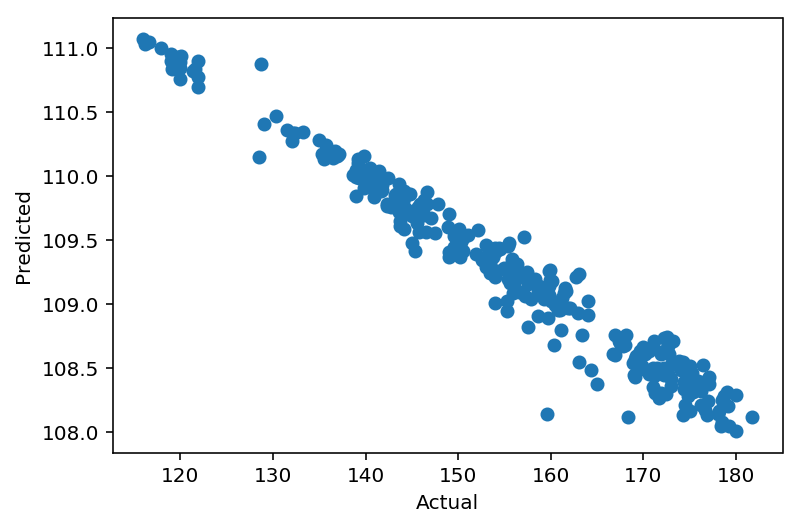

In [23]:
br_pca = br_model(X_train_pca, y_train, X_test_pca, y_test, lr, 
         n_estimators= 15, max_samples=11, max_features=1.0, bootstrap=True)

### Using Bagging Regressor on a Linear Model with the Scaled Data:

In [24]:
# br_scaled = br_model(X_train_sc, y_train, X_test_sc, y_test, lr, 
#          n_estimators= 15, max_samples=11, max_features=1.0, bootstrap=True)

------

# Ada Boost Regression Models

### Creating a Function to Fit an Ada Boost Model:

In [25]:
def ada_boost_model(X_train, y_train, X_test, y_test, base_estimator, n_estimators, learning_rate, loss):
    """
    Returns the fitted model using the Ada Boost Regression Model from SK-Learn.
    Prints the Training Score, Testing score, & the average price predicted.
    Renders a visualization of the Predicted and Actual Prices.
    
    Parameters
    -------------------------------------------------------------------------------------------------------------
    X_train : var
        Passes the variable assigned to the X variable of your training set, whether scaled or not. 
   
    y_train : var
        Passes the variable assigned to the y variable of your training set, whether scaled or not. 
    
    X_test : var
        Passes the variable assigned to the X variable of your testing set, whether scaled or not. 
    
    y_test : var
        Passes the variable assigned to the y variable of your testing set, whether scaled or not. 
    
    Ada Boost Regression Parameters
    -------------------------------------------------------------------------------------------------------------
    base_estimator : var
        Passes the variable assigned to the scikit learn model.  >> lr = LinearRegression()
    
    n_estimators : int
        Passes the number of estimators to be used in the Ada Boost Regression Model.  
    
    max_samples : int
        Passes the maximum number of samples to be used in the Ada Boost Regression Model.  
    
    max_features : float
        Passes the maximum number of features to be used in the Ada Boost Regression Model.  
    
    loss : str
        Passes a string as a loss.
    """
    
    
    booster = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=n_estimators, 
                            learning_rate=learning_rate, loss=loss, random_state=42)
    booster.fit(X_train, y_train)
    train_score = booster.score(X_train, y_train)
    test_score = booster.score(X_test, y_test)
    prediction = booster.predict(X_test).mean()
    
    plt.scatter(y_test, booster.predict(X_test_sc))
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    
    print(f'Train Score: {train_score}\nTest Score: {test_score}\nPredictive Mean: {prediction}') 
    return booster

Train Score: 0.9976822280807409
Test Score: 0.8311194906253007
Predictive Mean: 148.8828797922283


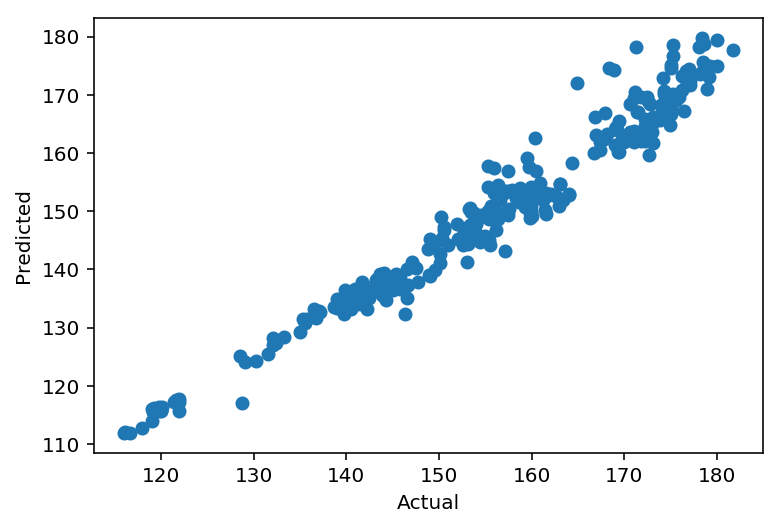

In [26]:
ada_booster = ada_boost_model(X_train_sc, y_train, X_test_sc, y_test, 
                base_estimator=lr, n_estimators=1, learning_rate=1, loss='linear')


## Grid Searching a Gradient Boosting Regression:

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [28]:
pipe = Pipeline([
    ('gbr', GradientBoostingRegressor())
])

In [29]:
loss = ['ls', 'lad']

learning_rate = [x for x in np.linspace(0, 2, 5)]

n_estimators = [x for x in range(8, 14, 2)]

max_features = [x for x in range(0, 14, 2)]

subsample = [x for x in range(1, 3)]

max_depth = [x for x in range(1, 3)]
max_depth.append(None)

min_samples_split = [x for x in range(1, 5)]

min_samples_leaf = [x for x in range(1, 3)]

alpha = [x for x in np.linspace(0, 2, 5)]

In [30]:
GradientBoostingRegressor()

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [31]:
params = {'gbr__loss' : loss,
          'gbr__learning_rate' : learning_rate,
          'gbr__n_estimators' : n_estimators,
          'gbr__max_features' : max_features,
          'gbr__subsample' : subsample,
          'gbr__max_depth': max_depth,
          'gbr__min_samples_split': min_samples_split,
          'gbr__min_samples_leaf': min_samples_leaf}

print(params)

{'gbr__loss': ['ls', 'lad'], 'gbr__learning_rate': [0.0, 0.5, 1.0, 1.5, 2.0], 'gbr__n_estimators': [8, 10, 12], 'gbr__max_features': [0, 2, 4, 6, 8, 10, 12], 'gbr__subsample': [1, 2], 'gbr__max_depth': [1, 2, None], 'gbr__min_samples_split': [1, 2, 3, 4], 'gbr__min_samples_leaf': [1, 2]}


In [32]:
grid = GridSearchCV(pipe, params, n_jobs=3)

In [33]:
grid.fit(X_train_sc, y_train)

KeyboardInterrupt: 

In [ ]:
grid.score(X_train_sc, y_train)